### Exercise 1:
Perform a simple linear regression to find the $m$ and $b$ values that minimizes the loss (sum of squares).

### Solution 1

m = [1.75919315]
b = [4.69359655]


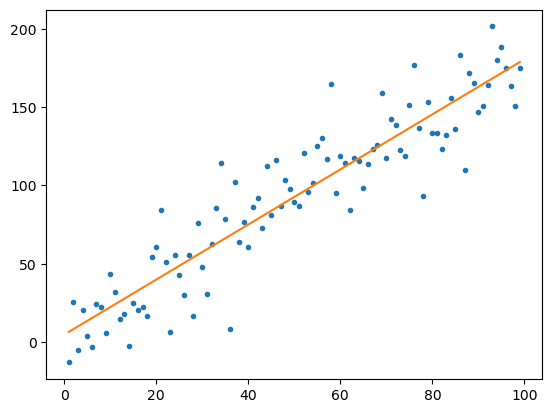

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import data from the csv
df = pd.read_csv("dataset_chapter5.csv", delimiter=",")

# We extract variables x & y. Data is from all rows and all columns except the last one.
x = df.values[:, :-1]
y = df.values[:, -1]

# Use LinearRegression to fit a line 
fit = LinearRegression().fit(x, y)

# Compute m & b values
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}". format(m))
print("b = {0}". format(b))

# The line
y_0 = m*x+b

# Plot the results
plt.plot(x, y, '.') # Scatterplot
plt.plot(x,y_0) # Line
plt.show()

### Exercise 2:
Calculate the correlation coefficient and statistical significance of this data (at $95\%$ confidence). Is the correlation useful?

### Solution 2

In [5]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Load dataset
file_path = "dataset_chapter5.csv"
df = pd.read_csv(file_path)

# Compute correlation matrix
correlation_matrix = df.corr(method='pearson')
print("Correlation Matrix:\n", correlation_matrix)
print("") # Just to have an space in the solution

# Extract correlation coefficient for x and y
r_value = correlation_matrix.loc["y", "x"]
n = len(df)

def perform_correlation_test(r, n):
    """Performs a hypothesis test for correlation significance."""
    # Compute test statistic
    test_statistic = r * np.sqrt((n - 2) / (1 - r**2))
    
    # Determine critical values for 95% confidence interval
    lower_critical, upper_critical = stats.t.ppf([0.025, 0.975], df=n-1)
    
    # Determine p-value (two-tailed test)
    p_value = 2 * (1 - stats.t.cdf(abs(test_statistic), df=n-1))
    
    # Print results
    print(f"Test Statistic: {test_statistic:.4f}")
    print(f"Critical Range: ({lower_critical:.4f}, {upper_critical:.4f})")
    print(f"P-Value: {p_value:.4f}")
    
    if test_statistic < lower_critical or test_statistic > upper_critical:
        print("Correlation is statistically significant, reject H0.")
    else:
        print("Correlation is not statistically significant, fail to reject H0.")

# Perform the correlation test
perform_correlation_test(r_value, n)

Correlation Matrix:
          x        y
x  1.00000  0.92421
y  0.92421  1.00000

Test Statistic: 23.8355
Critical Range: (-1.9845, 1.9845)
P-Value: 0.0000
Correlation is statistically significant, reject H0.


### Exercise 3:
If I predict where x = 50, what is the 95% prediction interval for the predicted value of y?

### Solution 3

In [7]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Load dataset
file_path = "dataset_chapter5.csv"
df = pd.read_csv(file_path)
n = len(df)

# Linear regression parameters
m = 1.75919315
b = 4.69359655

# Prediction parameters
x_0 = 50
x_mean = df["x"].mean()
t_value = stats.t.ppf(0.975, df=n-2)

# Compute standard error
standard_error = np.sqrt(np.sum((df["y"] - (m * df["x"] + b)) ** 2) / (n - 2))

# Compute margin of error
numerator = n * (x_0 - x_mean) ** 2
denominator = n * np.sum(df["x"] ** 2) - np.sum(df["x"]) ** 2
margin_of_error = t_value * standard_error * np.sqrt(1 + (1/n) + (numerator / denominator))

# Compute predicted y
predicted_y = m * x_0 + b

# Output prediction interval
lower_bound = predicted_y - margin_of_error
upper_bound = predicted_y + margin_of_error
print(f"Prediction Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Prediction Interval: (50.7921, 134.5144)


### Exercise 4:
Start your regression over and do a train/test split. Feel free to experiment with cross-validation and random-fold validation. Does the linear regression perform well and consistently on the testing data? Why or why not?

### Solution 4

In [27]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# Load dataset
file_path = "dataset_chapter5.csv"
df = pd.read_csv(file_path)
n = len(df)

# Extract input variables (all rows, all columns but last column)
x = df.values[:, :-1]
# Extract output column (all rows, last column)
y = df.values[:, -1]

# Compute simple linear regression
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, x, y, cv=kfold)

# Output results
print(f"Cross-validation scores: {results}")
print(f"MSE: mean= {results.mean():.3f} (stdev={results.std():.3f})")

Cross-validation scores: [0.86119665 0.78237719 0.85733887]
MSE: mean= 0.834 (stdev=0.036)
